In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_dep = pd.read_csv('departamentos-pro.csv', dtype="string")
df_casa = pd.read_csv('casas-pro.csv', dtype="string")
df_lote = pd.read_csv('terrenos-venta.csv',dtype="string")
colonias=['El Refugio','Candiles','Juriquilla','Jurica','Cumbres del Lago','El Pueblito','El Campanario','Centro Sur','El Mirador','Milenio']

def convertir(precios):
    lista=[]
    for i in precios:          
        if i[0]=='U':               
            dato=i
            i=i.replace("USD ","")
            a=float(i)                        
            a=round(a*20.58,1)
            a=int(a)
            a=str(a)                           
            lista.append(a)
        else:
            lista.append(i)
    return lista

def limpiar(precios):
    lista=precios
    lista=lista.str.replace("MN ", "", regex=True).str.replace("$","",regex=False).str.replace(",","",regex=False)
    lista=convertir(lista)
    lista=pd.to_numeric(lista,errors="coerce")    
    return lista

def limpiar_m(metros):
    lista=metros
    lista=lista.str.replace("m²","",regex=True)
    lista=pd.to_numeric(lista,errors="coerce")
    return lista

def limpiar_r(habts):
    lista=habts
    lista=lista.str.replace("rec.","",regex=True)
    lista=pd.to_numeric(lista,errors="coerce")
    return lista

def limpiar_b(bans):
    lista=bans
    lista=lista.str.replace("Baños","",regex=True).str.replace("Baño","",regex=True).str.replace("baños","",regex=False).str.replace("baño","",regex=False)
    lista=pd.to_numeric(lista,errors="coerce")
    return lista


In [14]:
# CARACTERISTICAS PROMEDIO DE UN DEPARTAMENTO
df_dep['nprecio']=limpiar(df_dep['precio'])
df_dep['nprecio']=df_dep['nprecio'].replace(0,np.NaN)
df_dep['nmetros']=limpiar_m(df_dep['mets'])
df_dep['nmetros']=df_dep['nmetros'].replace(0,np.NaN)
df_dep['nhabts']=limpiar_r(df_dep['habts'])
df_dep['nhabts']=df_dep['nhabts'].replace(0,np.NaN)
df_dep['nban']=limpiar_b(df_dep['ban'])
df_dep['nban']=df_dep['nban'].replace(0,np.NaN)

print("En Querétaro un departamento tiene las siguientes características promedio: ")
print("Precio promedio de renta de un departamento es de $",round(df_dep['nprecio'].mean(),3))
print("Comúnmente cuentan con ",df_dep['nhabts'].mode()[0]," recámaras, ",df_dep['nban'].mode()[0]," baños y ",df_dep['nmetros'].mode()[0]," metros cuadrados")

En Querétaro un departamento tiene las siguientes características promedio: 
Precio promedio de renta de un departamento es de $ 18838.425
Comúnmente cuentan con  2  recámaras,  2  baños y  120  metros cuadrados


In [15]:
# CARACTERISTICAS PROMEDIO DE UNA CASA
df_casa['nprecio']=limpiar(df_casa['precio'])
df_casa['nprecio']=df_casa['nprecio'].replace(0,np.NaN)
df_casa['nmetros']=limpiar_m(df_casa['mets'])
df_casa['nmetros']=df_casa['nmetros'].replace(0,np.NaN)
df_casa['nhabts']=limpiar_r(df_casa['habts'])
df_casa['nhabts']=df_casa['nhabts'].replace(0,np.NaN)
df_casa['nban']=limpiar_b(df_casa['ban'])
df_casa['nban']=df_casa['nban'].replace(0,np.NaN)

print("En Querétaro una casa tiene las siguientes características promedio: ")
print("Precio promedio de venta de una casa es de $",round(df_casa['nprecio'].mean(),3))
print("Comúnmente cuentan con ",df_casa['nhabts'].mode()[0]," recámaras, ",df_casa['nban'].mode()[0]," baños y ",df_casa['nmetros'].mode()[0]," metros cuadrados")

En Querétaro una casa tiene las siguientes características promedio: 
Precio promedio de venta de una casa es de $ 5480599.61
Comúnmente cuentan con  3.0  recámaras,  3.0  baños y  128.0  metros cuadrados


6361416.975337626
12500.0
199990000.0


Text(2, 30000000, 'Mediana=3,500,000')

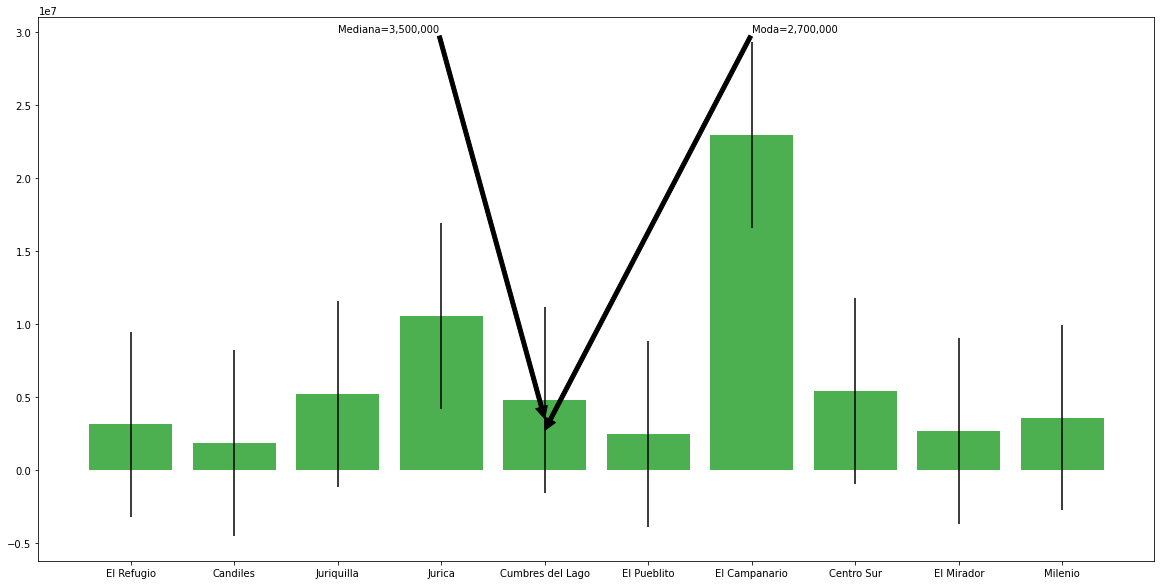

In [16]:
# GRAFICA MODA, MEDIANA, DESVIACION ESTANDAR DE PRECIOS DE CASAS
casa_ord=df_casa.sort_values(by='nprecio', ascending=False)
prom_casas=[df_casa.loc[df_casa['web-scraper-start-url'].str.contains("refugio"),'nprecio'].mean(),
           df_casa.loc[df_casa['web-scraper-start-url'].str.contains("candiles"),'nprecio'].mean(),
           df_casa.loc[df_casa['web-scraper-start-url'].str.contains("juriquilla"),'nprecio'].mean(),
           df_casa.loc[df_casa['web-scraper-start-url'].str.contains("jurica"),'nprecio'].mean(),
           df_casa.loc[df_casa['web-scraper-start-url'].str.contains("cumbres"),'nprecio'].mean(),
           df_casa.loc[df_casa['web-scraper-start-url'].str.contains("pueblito"),'nprecio'].mean(),
           df_casa.loc[df_casa['web-scraper-start-url'].str.contains("campanario"),'nprecio'].mean(),
           df_casa.loc[df_casa['web-scraper-start-url'].str.contains("sur"),'nprecio'].mean(),
           df_casa.loc[df_casa['web-scraper-start-url'].str.contains("mirador"),'nprecio'].mean(),
           df_casa.loc[df_casa['web-scraper-start-url'].str.contains("milenio"),'nprecio'].mean()]
variance_casa=np.std(df_casa['nprecio'])
print(variance_casa)
print(df_casa['nprecio'].min())
print(df_casa['nprecio'].max())
fig1 = plt.figure()
fig1.set_figheight(10)
fig1.set_figwidth(20)
plt.bar(colonias,prom_casas,color="#4CAF50",yerr=variance_casa)
plt.annotate('Moda=2,700,000',xy=("Cumbres del Lago",2700000),xytext=(6,30000000),arrowprops=dict(facecolor='black'))
plt.annotate('Mediana=3,500,000',xy=("Cumbres del Lago",3500000),xytext=(2,30000000),arrowprops=dict(facecolor='black'))


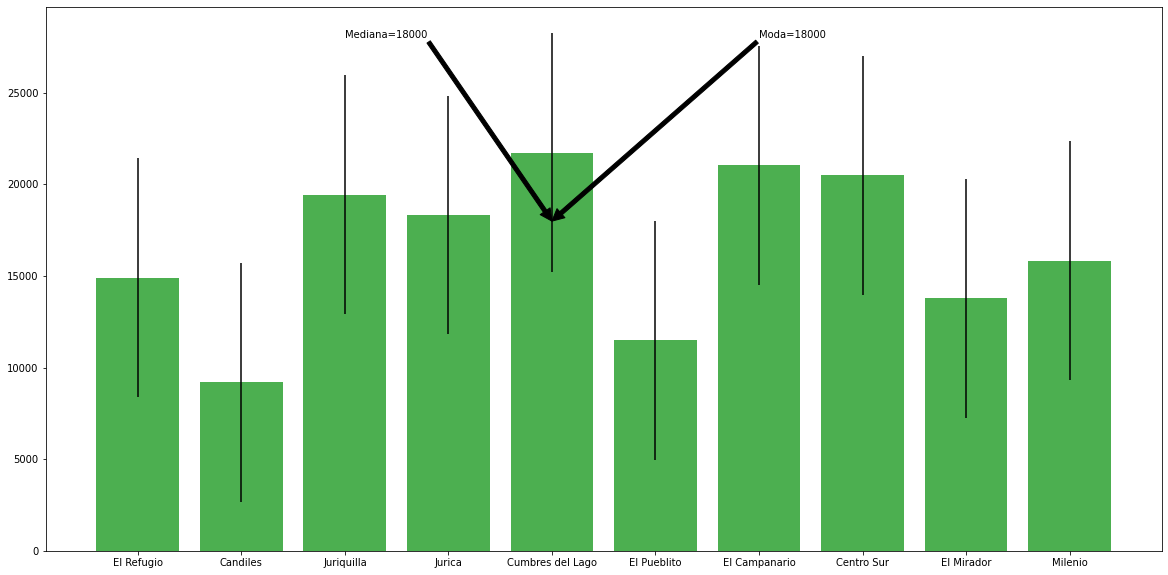

In [17]:
# GRAFICA MODA, MEDIANA, DESVIACION ESTANDAR DE PRECIOS DE DEPARTAMENTOS
dep_ord=df_dep.sort_values(by='nprecio', ascending=False)
prom_depts=[df_dep.loc[df_dep['web-scraper-start-url'].str.contains("refugio"),'nprecio'].mean(),
           df_dep.loc[df_dep['web-scraper-start-url'].str.contains("candiles"),'nprecio'].mean(),
           df_dep.loc[df_dep['web-scraper-start-url'].str.contains("juriquilla"),'nprecio'].mean(),
           df_dep.loc[df_dep['web-scraper-start-url'].str.contains("jurica"),'nprecio'].mean(),
           df_dep.loc[df_dep['web-scraper-start-url'].str.contains("cumbres"),'nprecio'].mean(),
           df_dep.loc[df_dep['web-scraper-start-url'].str.contains("pueblito"),'nprecio'].mean(),
           df_dep.loc[df_dep['web-scraper-start-url'].str.contains("campanario"),'nprecio'].mean(),
           df_dep.loc[df_dep['web-scraper-start-url'].str.contains("sur"),'nprecio'].mean(),
           df_dep.loc[df_dep['web-scraper-start-url'].str.contains("mirador"),'nprecio'].mean(),
           df_dep.loc[df_dep['web-scraper-start-url'].str.contains("milenio"),'nprecio'].mean()]
variance=np.std(df_dep['nprecio'])
#print(df_dep['nprecio'].mode()[0])
#print(por_precio['nprecio'].median())
fig2 = plt.figure()
fig2.set_figheight(10)
fig2.set_figwidth(20)
plt.bar(colonias,prom_depts,color="#4CAF50",yerr=variance)
plt.annotate('Moda=18000',xy=("Cumbres del Lago",18000),xytext=(6,28000),arrowprops=dict(facecolor='black'))
plt.annotate('Mediana=18000',xy=("Cumbres del Lago",18000),xytext=(2,28000),arrowprops=dict(facecolor='black'))
plt.show()


In [18]:
# EJEMPLO Y DESCRIPCION TOP 5 PROPIEDADES DE MAYOR VALOR EN RENTA
print("Top 5 departamentos de mayor valor en renta")
dep_ord.head()

Top 5 departamentos de mayor valor en renta


,web-scraper-order,web-scraper-start-url,titulo,precio,habts,ban,mets,nprecio,nmetros,nhabts,nban
95,1620505969-11427,https://www.lamudi.com.mx/queretaro-arteaga/qu...,Amueblado en juriquilla con impresionante vist...,"$100,000",4,4Baños,344 m²,100000.0,344,4,4
1378,1620513441-12537,https://www.inmuebles24.com/departamentos-en-r...,Departamento en Renta en Cumbres del Lago,"MN 75,000",3 rec.,5 baños,643 m²,75000.0,643,3,5
1285,1620513455-12545,https://www.inmuebles24.com/departamentos-en-r...,Penthouse con Roofgarden y Vista Al Lago. Magn...,"MN 60,000",3 rec.,3 baños,183 m²,60000.0,183,3,3
678,1620505928-11308,https://www.lamudi.com.mx/queretaro-arteaga/qu...,Penthouse con Roofgarden y vista al Lago. Magn...,"$60,000",3,3Baños,183 m²,60000.0,183,3,3
580,1620505346-10474,https://www.lamudi.com.mx/queretaro-arteaga/qu...,Penthouse con Roofgarden y vista al Lago. Magn...,"$60,000",3,3Baños,183 m²,60000.0,183,3,3


In [19]:
# EJEMPLO Y DESCRIPCION TOP 5 PROPIEDADES DE MAYOR VALOR EN VENTA
print("Top 5 casas de mayor valor en venta")
casa_ord.head()

Top 5 casas de mayor valor en venta


,web-scraper-order,web-scraper-start-url,titulo,precio,habts,ban,mets,nprecio,nmetros,nhabts,nban
8298,1620525480-14810,https://www.lamudi.com.mx/queretaro-arteaga/qu...,Casa en venta El Campanario 4 habitaciones JRH,"$199,990,000",4,4,700,199990000.0,700.0,4.0,4.0
8537,1620525267-14795,https://www.lamudi.com.mx/queretaro-arteaga/qu...,"Residencia, Campo de Golf y Alberca Privada El...","$199,899,995",4,4.5,700,199899995.0,700.0,4.0,4.5
8414,1620526498-14902,https://www.lamudi.com.mx/queretaro-arteaga/qu...,ESPECTACULAR RESIDENCIA EN EL CAMPANARIO,"$62,670,000",4,5,1223,62670000.0,1223.0,4.0,5.0
3913,1620529306-18879,https://www.inmuebles24.com/casas-en-venta-en-...,Exclusiva Residencia de Dos Plantas con Jardin...,"USD 3,000,000",4 rec.,4 baños,1223 m²,61740000.0,1223.0,4.0,4.0
6846,1620525714-14831,https://www.lamudi.com.mx/queretaro-arteaga/qu...,CASA EN VENTA EN EL CAMPANARIO QUERÉTARO,"$60,000,000",2,6,2021,60000000.0,2021.0,2.0,6.0


In [20]:
# PRECIO POR M2 DE CADA UNA DE LAS 10 COLONIAS EN PROPIEDADES CONSTRUIDAS
df_casa['precio-m2']=df_casa['nprecio']/df_casa['nmetros']
print("Precio de venta de terreno por m2 en El Refugio = $",round(df_casa.loc[df_casa['web-scraper-start-url'].str.contains("refugio"),'precio-m2'].mean(),3))
print("Precio de venta de terreno por m2 en El Campanario = $",round(df_casa.loc[df_casa['web-scraper-start-url'].str.contains("campanario"),'precio-m2'].mean(),3))
print("Precio de venta de terreno por m2 en Centro Sur = $",round(df_casa.loc[df_casa['web-scraper-start-url'].str.contains("sur"),'precio-m2'].mean(),3))
print("Precio de venta de terreno por m2 en Juriquilla = $",round(df_casa.loc[df_casa['web-scraper-start-url'].str.contains("juriquilla"),'precio-m2'].mean(),3))
print("Precio de venta de terreno por m2 en Jurica = $",round(df_casa.loc[df_casa['web-scraper-start-url'].str.contains("jurica"),'precio-m2'].mean(),3))
print("Precio de venta de terreno por m2 en El Pueblito = $",round(df_casa.loc[df_casa['web-scraper-start-url'].str.contains("pueblito"),'precio-m2'].mean(),3))
print("Precio de venta de terreno por m2 en Candiles = $",round(df_casa.loc[df_casa['web-scraper-start-url'].str.contains("candiles"),'precio-m2'].mean(),3))
print("Precio de venta de terreno por m2 en Milenio = $",round(df_casa.loc[df_casa['web-scraper-start-url'].str.contains("milenio"),'precio-m2'].mean(),3))
print("Precio de venta de terreno por m2 en Cumbres del Lago = $",round(df_casa.loc[df_casa['web-scraper-start-url'].str.contains("cumbres"),'precio-m2'].mean(),3))
print("Precio de venta de terreno por m2 en El Mirador = $",round(df_casa.loc[df_casa['web-scraper-start-url'].str.contains("mirador"),'precio-m2'].mean(),3))

Precio de venta de terreno por m2 en El Refugio = $ 18824.092
Precio de venta de terreno por m2 en El Campanario = $ 28434.883
Precio de venta de terreno por m2 en Centro Sur = $ 20806.06
Precio de venta de terreno por m2 en Juriquilla = $ 16813.052
Precio de venta de terreno por m2 en Jurica = $ 16004.838
Precio de venta de terreno por m2 en El Pueblito = $ 14598.361
Precio de venta de terreno por m2 en Candiles = $ 14719.722
Precio de venta de terreno por m2 en Milenio = $ 19335.325
Precio de venta de terreno por m2 en Cumbres del Lago = $ 17930.502
Precio de venta de terreno por m2 en El Mirador = $ 18610.627


In [21]:
# PRECIO POR M2 DE CADA UNA DE LAS 10 COLONIAS EN PROPIEDADES SIN CONSTRUIR
df_lote['nprecio']=limpiar(df_lote['precio'])
df_lote['nprecio']=df_lote['nprecio'].replace(0,np.NaN)
df_lote['nmetros']=limpiar_m(df_lote['mets'])
df_lote['nmetros']=df_lote['nmetros'].replace(0,np.NaN)
df_lote['precio-m2']=df_lote['nprecio']/df_lote['nmetros']

print("Precio de terreno por m2 en El Refugio = $",round(df_lote.loc[df_lote['web-scraper-start-url'].str.contains("refugio"),'precio-m2'].mean(),3))
print("Precio de terreno por m2 en El Campanario = $",round(df_lote.loc[df_lote['web-scraper-start-url'].str.contains("campanario"),'precio-m2'].mean(),3))
print("Precio de terreno por m2 en Centro Sur = $",round(df_lote.loc[df_lote['web-scraper-start-url'].str.contains("sur"),'precio-m2'].mean(),3))
print("Precio de terreno por m2 en Juriquilla = $",round(df_lote.loc[df_lote['web-scraper-start-url'].str.contains("juriquilla"),'precio-m2'].mean(),3))
print("Precio de terreno por m2 en Jurica = $",round(df_lote.loc[df_lote['web-scraper-start-url'].str.contains("jurica"),'precio-m2'].mean(),3))
print("Precio de terreno por m2 en El Pueblito = $",round(df_lote.loc[df_lote['web-scraper-start-url'].str.contains("pueblito"),'precio-m2'].mean(),3))
print("Precio de terreno por m2 en Candiles = $",round(df_lote.loc[df_lote['web-scraper-start-url'].str.contains("candiles"),'precio-m2'].mean(),3))
print("Precio de terreno por m2 en Milenio = $",round(df_lote.loc[df_lote['web-scraper-start-url'].str.contains("milenio"),'precio-m2'].mean(),3))
print("Precio de terreno por m2 en Cumbres del Lago = $",round(df_lote.loc[df_lote['web-scraper-start-url'].str.contains("cumbres"),'precio-m2'].mean(),3))
print("Precio de terreno por m2 en El Mirador = $",round(df_lote.loc[df_lote['web-scraper-start-url'].str.contains("mirador"),'precio-m2'].mean(),3))


Precio de terreno por m2 en El Refugio = $ 6396.662
Precio de terreno por m2 en El Campanario = $ 9442.321
Precio de terreno por m2 en Centro Sur = $ 7335.839
Precio de terreno por m2 en Juriquilla = $ 4570.756
Precio de terreno por m2 en Jurica = $ 5297.119
Precio de terreno por m2 en El Pueblito = $ 4825.785
Precio de terreno por m2 en Candiles = $ 4212.431
Precio de terreno por m2 en Milenio = $ 6411.101
Precio de terreno por m2 en Cumbres del Lago = $ 5632.325
Precio de terreno por m2 en El Mirador = $ 4748.733


In [22]:
# PRECIO POR M2 DE RENTA DE CADA UNA DE LAS 10 COLONIAS
df_dep['precio-m2']=df_dep['nprecio']/df_dep['nmetros']
print("Precio de renta de terreno por m2 en El Refugio = $",round(df_dep.loc[df_dep['web-scraper-start-url'].str.contains("refugio"),'precio-m2'].mean(),3))
print("Precio de renta de terreno por m2 en El Campanario = $",round(df_dep.loc[df_dep['web-scraper-start-url'].str.contains("campanario"),'precio-m2'].mean(),3))
print("Precio de renta de terreno por m2 en Centro Sur = $",round(df_dep.loc[df_dep['web-scraper-start-url'].str.contains("sur"),'precio-m2'].mean(),3))
print("Precio de renta de terreno por m2 en Juriquilla = $",round(df_dep.loc[df_dep['web-scraper-start-url'].str.contains("juriquilla"),'precio-m2'].mean(),3))
print("Precio de renta de terreno por m2 en Jurica = $",round(df_dep.loc[df_dep['web-scraper-start-url'].str.contains("jurica"),'precio-m2'].mean(),3))
print("Precio de renta de terreno por m2 en El Pueblito = $",round(df_dep.loc[df_dep['web-scraper-start-url'].str.contains("pueblito"),'precio-m2'].mean(),3))
print("Precio de renta de terreno por m2 en Candiles = $",round(df_dep.loc[df_dep['web-scraper-start-url'].str.contains("candiles"),'precio-m2'].mean(),3))
print("Precio de renta de terreno por m2 en Milenio = $",round(df_dep.loc[df_dep['web-scraper-start-url'].str.contains("milenio"),'precio-m2'].mean(),3))
print("Precio de renta de terreno por m2 en Cumbres del Lago = $",round(df_dep.loc[df_dep['web-scraper-start-url'].str.contains("cumbres"),'precio-m2'].mean(),3))
print("Precio de renta de terreno por m2 en El Mirador = $",round(df_dep.loc[df_dep['web-scraper-start-url'].str.contains("mirador"),'precio-m2'].mean(),3))

Precio de renta de terreno por m2 en El Refugio = $ 122.678
Precio de renta de terreno por m2 en El Campanario = $ 233.613
Precio de renta de terreno por m2 en Centro Sur = $ 204.215
Precio de renta de terreno por m2 en Juriquilla = $ 156.466
Precio de renta de terreno por m2 en Jurica = $ 147.68
Precio de renta de terreno por m2 en El Pueblito = $ 91.83
Precio de renta de terreno por m2 en Candiles = $ 93.878
Precio de renta de terreno por m2 en Milenio = $ 167.157
Precio de renta de terreno por m2 en Cumbres del Lago = $ 152.266
Precio de renta de terreno por m2 en El Mirador = $ 160.622
